In [1]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM5 import SCM5

  0%|          | 0/2 [00:00<?, ?it/s]

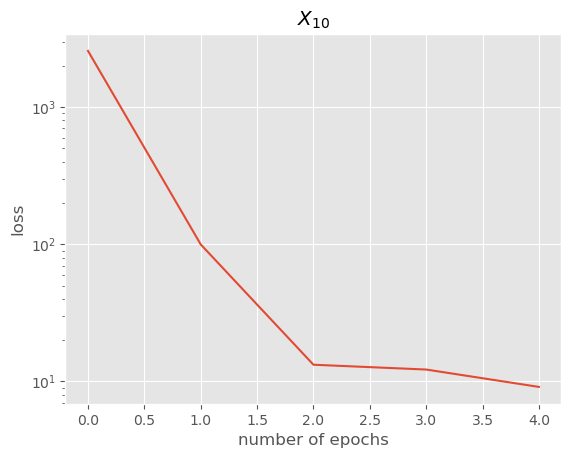

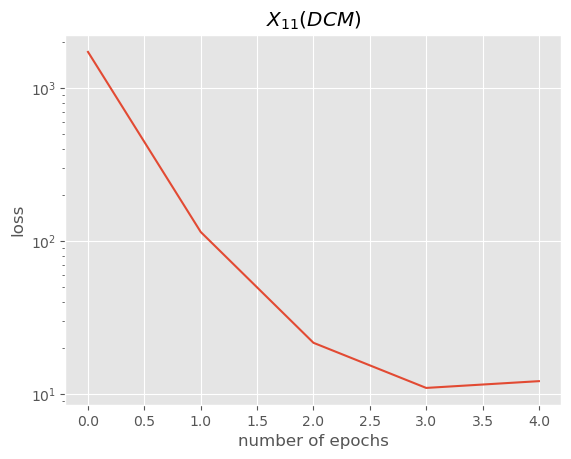

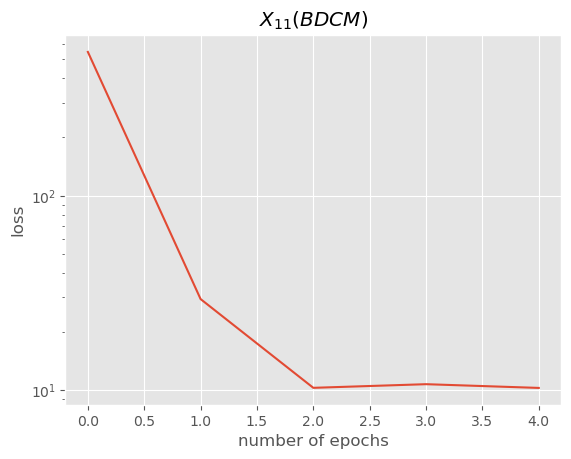

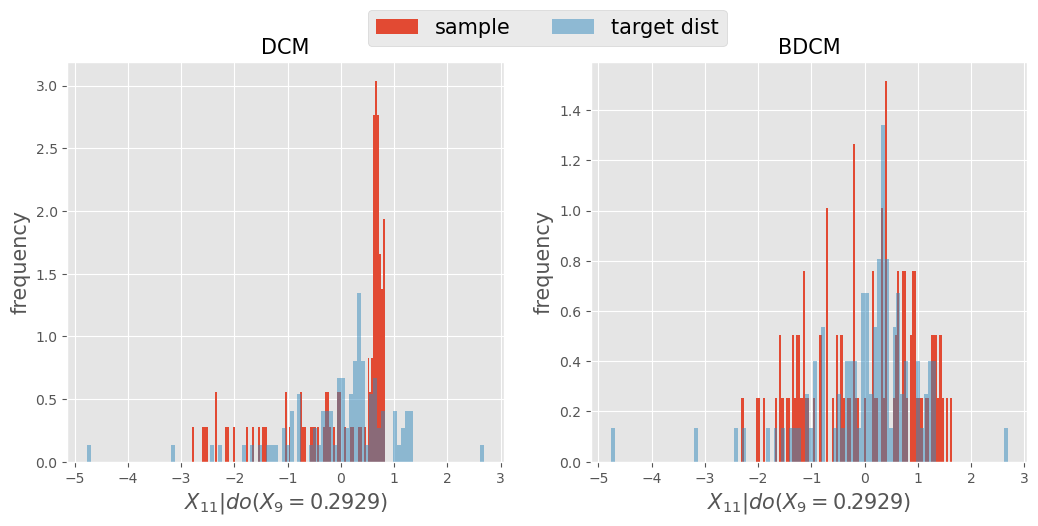

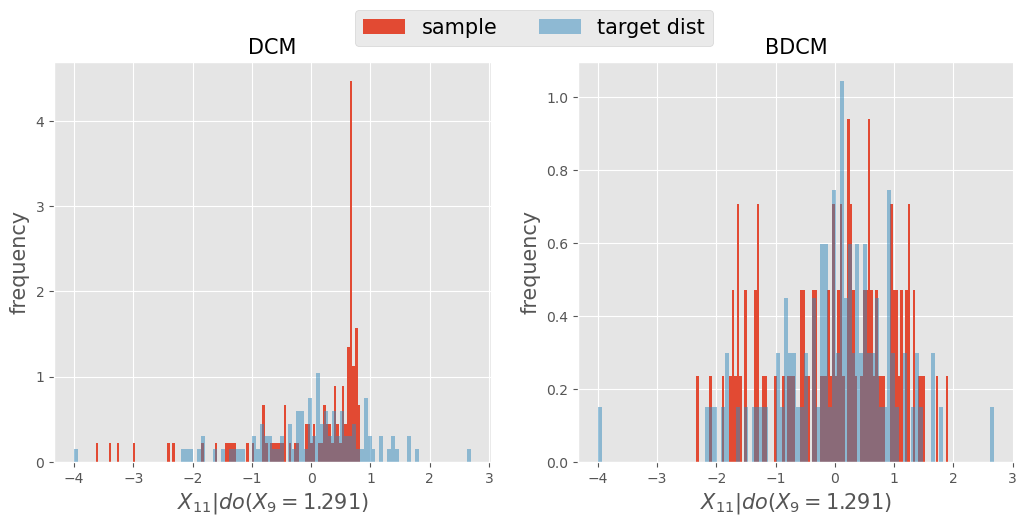

 50%|█████     | 1/2 [00:05<00:05,  5.36s/it]

mean of MMD for DCM: 0.000327
standard deviation of MMD for DCM: 0.00017
mean of MMD for BDCM: 0.000307
standard deviation of MMD for BDCM: 0.000226


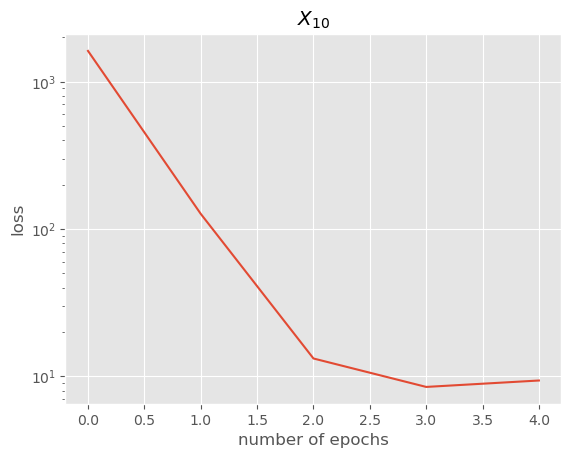

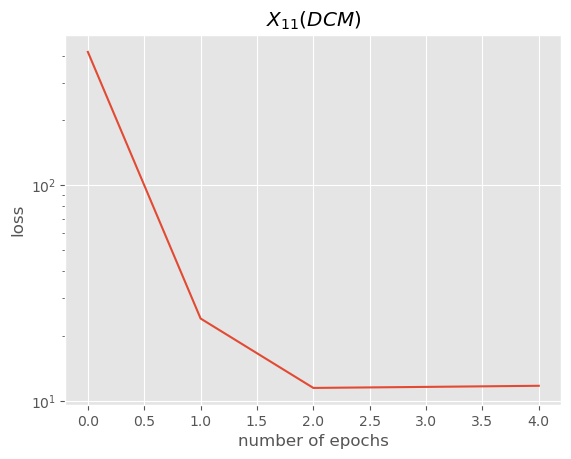

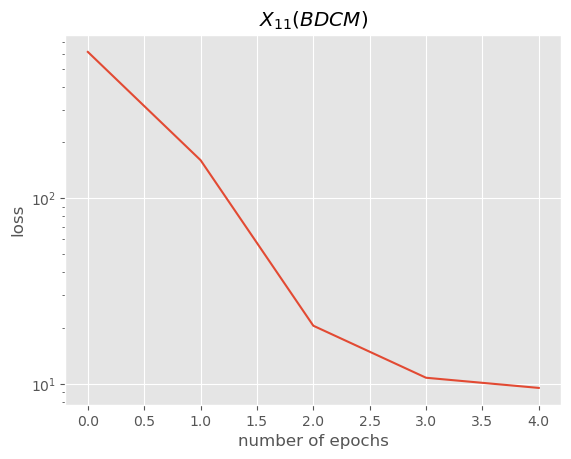

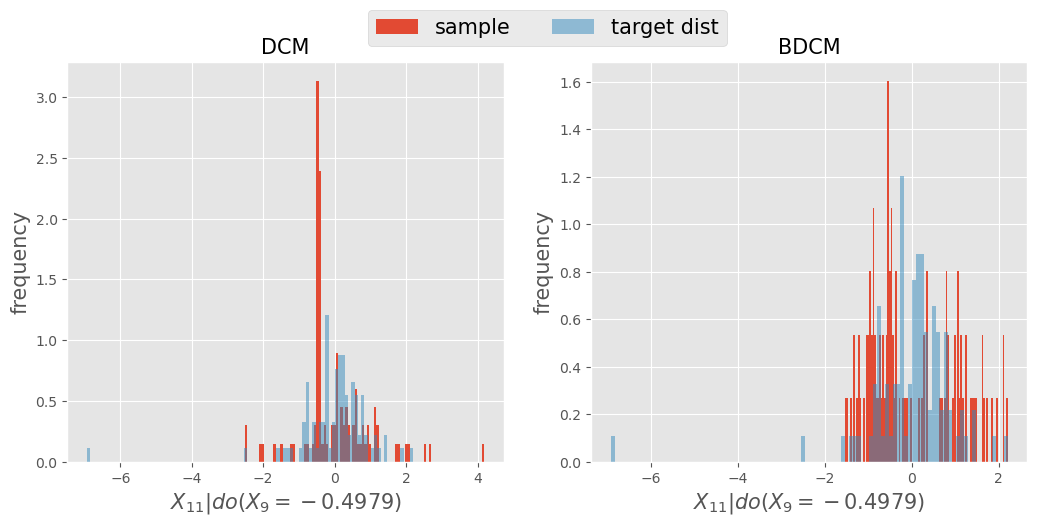

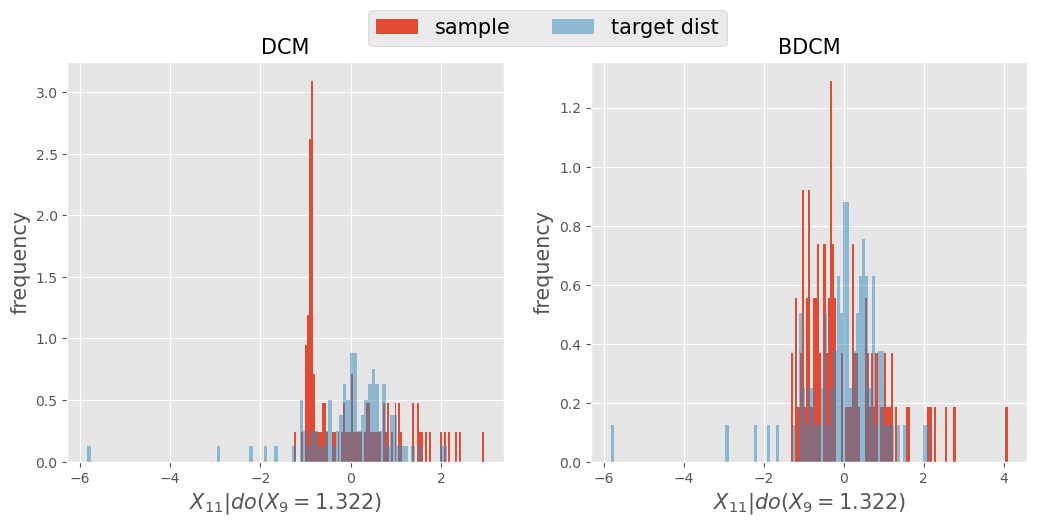

100%|██████████| 2/2 [00:10<00:00,  5.25s/it]

mean of MMD for DCM: 0.00243
standard deviation of MMD for DCM: 3.2e-05
mean of MMD for BDCM: 0.00284
standard deviation of MMD for BDCM: 0.000177
mean of all MMD for DCM: 0.00138
standard deviation of all MMD for DCM: 0.00106
mean of all MMD for BDCM: 0.00158
standard deviation of all MMD for BDCM: 0.00128


In [2]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = -x[0] + u
  elif ind == 2:
    output = x[1] + 0.1 + u
  elif ind == 3:
    output = -x[1] + 0.1 + u
  elif ind == 4:
    output = 1.3 * x[0] + u + x[0] * u
  elif ind == 5:
    output = - 1.2 * (x[4] + 0.1)  + x[4] + u
  elif ind == 6:
    output = -x[5] ** 2 - x[5] + u
  elif ind == 7:
    output = 3 * x[5] + 0.1 + u
  elif ind == 8:
    output = x[0] * x[4] + (x[0] + 0.1) - x[4] ** 2 + u
  elif ind == 9:
    output = x[8] ** 2 + u
  elif ind == 10:
    output = x[2] * x[3] + (x[6] * x[7] - 0.1) + x[8] * x[9] + x[2] * x[8] - x[6] * x[9] + x[7]
  return normalize(output)

SCM5(structural_eq=structural_eq, simple_or_complex = "simple")